 Anita Borawski, Marlo Lindquist, Kevin Gomez, Danielle Caccamo

## Student Name(s)

*Please enter the names of the students in your group here.*

# Final Project Intro

This notebook contains three sections for you to complete your final project:
1. Data Inspection and Exploratory Data Analysis
2. Explanatory Model
3. Predictive Models

In each section, we provide detailed instructions for what we expect you to complete, as well as the corresponding point allocation. We have included a single code cell for you to begin working. Please add code cells and markdown cells as needed and as appropriate!

Keep in mind that your final should look like a report: code cells should be used for generating output and commentary should be in markdown cells. Steps that should be answered by using code are numbered and given in black. Questions that should be answered using a markdown cell are in purple and bulleted.

**We will deduct points if you answer the questions given in purple in a code cell.**











# Problem Description and Data Dictionary

You are an analyst working for a real estate company seeking to diversify its portfolio by offering short-term AirBnB rentals in New York City. The company has managed to collect data on AirBnB listings in the area, which includes both the price per night and unit features. Having never offered AirBnB rentals in this area before, the company would like to use this data to do the following:
1. Understand which factors influence AirBnB pricing and how.
2. Develop a model to predict the appropriate list price for a unit based on its features.

The data dictionary is as follows, where *price* is the outcome variable:

| Variable                       | Description                                     |
|--------------------------------|-------------------------------------------------|
| ID                             | Unique identifier for listing                   |
| name                           | Listing name                                    |
| host_id                        | Unique identifier for a specific host           |
| neighbourhood_group            | The borough the listing is located              |
| neighbourhood                  | Neighborhood listing is located                 |
| latitude                       | Exact Location                                  |
| longitude                      | Exact Location                                  |
| room_type                      | Type of space for rent                          |
| minimum_nights                 | Minimum length of rental                        |
| number_of_reviews              | Total reviews for a listing                     |
| last_review                    | Date of most recent review                      |
| reviews_per_month              | How many reviews a listing receives each month  |
| calculated_host_listings_count | Amount of listings per host                     |
| availability_365               | How many available nights there are for booking |
| price                          | Price per night                                 |


# Section 0: Import packages and the dataset (10 points)

Import packages as needed and read the dataset. (The dataset link is on the project page.)



In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# tree visualization and model evaluation
from dmba import classificationSummary, regressionSummary, plotDecisionTree, textDecisionTree


# model evaluation and roc curve
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pylab as plt


In [ ]:
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/irenebao2020/badm211/main/airbnb.csv")

In [ ]:

# Create as many additional cells as needed

# Section 1: Dataset Inspection, Exploratory Data Analysis, and Preprocessing (40 points)

Complete the following steps and answer the following questions. For each step, please make sure to have one (or more) code cells and then create a markdown cell immediately following it in which to answer the question.

In this section, point allocations for each step will be based on both your code and response to the question.

**Data Inspection and Preprocessing** (20 points)

1. (*1 pt)* Print the first five rows.  

* <font color=purple> Name three categorical and three numerical variables.</font>

2. (*2 pts)* Print the descriptive statistics.

* <font color=purple> Describe 2-3 insights from this output.</font>

3. (*1 pt)* Print datatypes of the columns.

4. (*4 pts)* Use `groupby()` to show summary statistics for two numerical variables across different values of (at least) one categorical variable. (This simply asks for one `groupby` statement.)

* <font color=purple>What insights do you gain from this output?</font>

5. (*2 pts)* For two categorical variables of your choice, show the *proportion* of categories (AKA values) that each takes.

* <font color=purple>What can be said about the data based on these outputs?</font>

6. (*2 pts)* Check for missing values and handle them appropriately.

* <font color=purple>Are there any missing values in the data? If yes, which variable had the most missing values?</font>

7. (*2 pts)* Check for duplicate rows and handle them appropriately.

* <font color=purple>Are there any duplicate rows? If yes, how many?</font>

8. (*2 pts)* Show 5 rows of the data. By looking at the output you just generated, are there any variables that do *not* contain useful or relevant information about records? If so, be sure to remove them from the data. You may choose to remove multiple variables.

9. (*4 pts)* Identify what the outcome variable is. Depending on the variable type, provide summary statistics or the distribution of the outcome variable. If your outcome variable is a categorical variable, convert the text values to 0/1.

* <font color=purple>Is this a regression or classification problem? Why?</font>

**Data Visualization** (15 points)

*For this section, you can choose which variables you want to visualize. When completing this section, we encourage you to think about the relationships you are trying to explore and what you will ultimately be predicting.*

10. (*5 pts)* Draw a scatterplot.

* <font color=purple>Comment on your scatterplot.</font>

11. (*5 pts)* Draw a histogram.

* <font color=purple>Comment on your histogram. </font>

12. (*5 pts)* Draw a bar chart. Use mean as the summary statistic.

* <font color=purple>Comment on the bar chart.</font>

**Data Preprocessing** (5 points)

13. (*5 pts)* Dummy code your categorical variables.

* <font color=purple>How many variables are in the resulting dataframe?</font>


In [ ]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean_&_quiet_apt_home_by_the_park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private_room,1,9.0,10/19/18,0.21,6,365,149
1,2539,Clean_&_quiet_apt_home_by_the_park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private_room,1,9.0,10/19/18,0.21,6,365,149
2,2595,Skylit_Midtown_Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire_home/apt,1,45.0,5/21/19,0.38,2,355,225
3,3647,THE_VILLAGE_OF_HARLEM....NEW_YORK_!,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private_room,3,0.0,NaN,NaN,1,365,150
4,3831,Cozy_Entire_Floor_of_Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton_Hill,40.68514,-73.95976,Entire_home/apt,1,270.0,7/5/19,4.64,1,194,89


Categorical: neighbourhood_group, neighbourhood, room_type
Numerical: latitude, longitude, number_of_reviews

In [ ]:
df.describe()

,listing_id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
count,4.886300e+04,4.886200e+04,48863.000000,48861.000000,48863.000000,48860.000000,38829.000000,48863.000000,48863.000000,48863.000000
mean,1.901845e+07,6.763310e+07,40.728950,-73.952158,6.630354,23.298731,1.373789,7.147617,112.665534,152.603381
std,1.098382e+07,7.861868e+07,0.054532,0.046158,13.959867,44.574438,1.680554,32.962901,131.549568,239.833686
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.472744e+06,7.822737e+06,40.690090,-73.983070,1.000000,1.000000,0.190000,1.000000,0.000000,69.000000
50%,1.968202e+07,3.080252e+07,40.723080,-73.955680,3.000000,5.000000,0.720000,1.000000,45.000000,106.000000
75%,2.915256e+07,1.074344e+08,40.763130,-73.936230,5.000000,24.000000,2.020000,2.000000,226.000000,175.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,364.000000,629.000000,58.500000,327.000000,365.000000,10000.000000


On average, the minimum required nights spent is 6.63 and the maximum allowed is 23.29. There are 48,860 total reviews. The median price is $106 (assumed currency).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48863 entries, 0 to 48862
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      48863 non-null  int64  
 1   name                            48848 non-null  object 
 2   host_id                         48862 non-null  float64
 3   host_name                       48840 non-null  object 
 4   neighbourhood_group             48862 non-null  object 
 5   neighbourhood                   48863 non-null  object 
 6   latitude                        48863 non-null  float64
 7   longitude                       48861 non-null  float64
 8   room_type                       48862 non-null  object 
 9   minimum_nights                  48863 non-null  int64  
 10  number_of_reviews               48860 non-null  float64
 11  last_review                     38826 non-null  object 
 12  reviews_per_month               

In [ ]:
df.groupby("neighbourhood_group")["price", "reviews_per_month"].mean()

<ipython-input-70-9e046fc10072>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("neighbourhood_group")["price", "reviews_per_month"].mean()


,price,reviews_per_month
neighbourhood_group,,
Bronx,87.453297,1.836948
Brooklyn,124.318799,1.283765
Manhattan,196.875167,1.272835
Queens,98.760862,1.941500
Staten_Island,114.852151,1.872580


From this output, we can tell that staying in the Bronx is the cheapest and Manhattan is the most expensive. People who stay in Queens tend to write the most reviews per month.

In [ ]:
df["neighbourhood_group"].value_counts(normalize = True)

Manhattan        0.442982
Brooklyn         0.411178
Queens           0.115877
Bronx            0.022349
Staten_Island    0.007613
Name: neighbourhood_group, dtype: float64

In [ ]:
df["room_type"].value_counts(normalize = True)

Entire_home/apt    0.519524
Private_room       0.456756
Shared_room        0.023720
Name: room_type, dtype: float64

This shows us that nearly 85% of AirBnBs are in Manhattan and Brooklyn. Also, 52% of AirBnBs are entire home/apartment rentals.

In [ ]:
df = df.drop(columns = ['last_review','reviews_per_month'])

In [ ]:
df.isnull().sum()

listing_id                         0
name                              15
host_id                            1
host_name                         23
neighbourhood_group                1
neighbourhood                      0
latitude                           0
longitude                          2
room_type                          1
minimum_nights                     0
number_of_reviews                  3
calculated_host_listings_count     0
availability_365                   0
price                              0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

listing_id                        0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

Before handling the missing values, the variable "host_name" had the most missing values. We dropped columns last_review and reviews_per_month so those variables we not included in the count of missing values.

In [ ]:
df.duplicated().sum()

11

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

Before dropping the duplicated values, there were 11.

In [ ]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,2539,Clean_&_quiet_apt_home_by_the_park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private_room,1,9.0,6,365,149
2,2595,Skylit_Midtown_Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire_home/apt,1,45.0,2,355,225
3,3647,THE_VILLAGE_OF_HARLEM....NEW_YORK_!,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private_room,3,0.0,1,365,150
4,3831,Cozy_Entire_Floor_of_Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton_Hill,40.68514,-73.95976,Entire_home/apt,1,270.0,1,194,89
5,5022,Entire_Apt:_Spacious_Studio/Loft_by_central_park,7192.0,Laura,Manhattan,East_Harlem,40.79851,-73.94399,Entire_home/apt,10,9.0,1,0,80


The following variables do not contain useful or relevant information: listing_id and host_id.

In [ ]:
df = df.drop(columns = ['host_id', 'listing_id'])

In [ ]:
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price
0,Clean_&_quiet_apt_home_by_the_park,John,Brooklyn,Kensington,40.64749,-73.97237,Private_room,1,9.0,6,365,149
2,Skylit_Midtown_Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire_home/apt,1,45.0,2,355,225
3,THE_VILLAGE_OF_HARLEM....NEW_YORK_!,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private_room,3,0.0,1,365,150
4,Cozy_Entire_Floor_of_Brownstone,LisaRoxanne,Brooklyn,Clinton_Hill,40.68514,-73.95976,Entire_home/apt,1,270.0,1,194,89
5,Entire_Apt:_Spacious_Studio/Loft_by_central_park,Laura,Manhattan,East_Harlem,40.79851,-73.94399,Entire_home/apt,10,9.0,1,0,80


The outcome variable is *price*.

In [ ]:
df["price"].describe()

count    48807.000000
mean       152.628803
std        239.952136
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

This is a regression problem because the outcome variable price is a continuous numerical outcome.

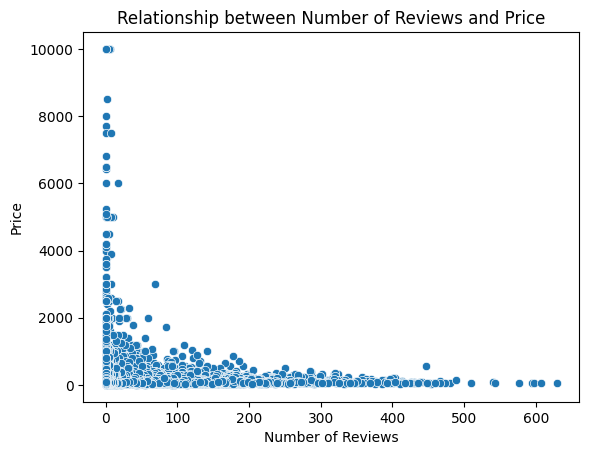

In [ ]:
sns.scatterplot(x=df["number_of_reviews"], y=df["price"])

plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Relationship between Number of Reviews and Price")

plt.show()

This scatterplot shows that the more expensive AirBnBs tend to have less reviews. One inference we could make is that this is because less people have rented out the more expensive AirBnBs.

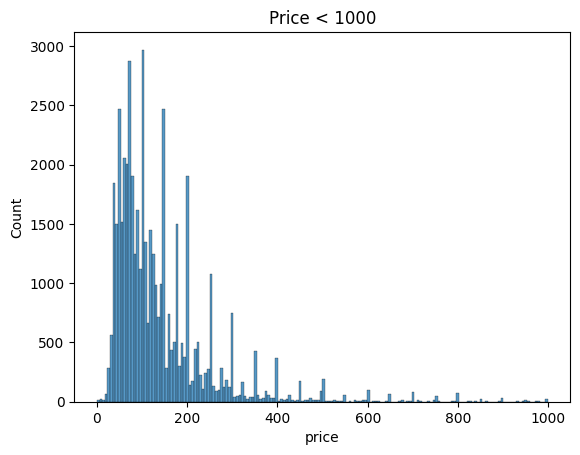

In [ ]:
sns.histplot(data =df[df["price"]<1000], x = "price")

plt.title('Price < 1000')
plt.show()
# df[df[var]<x]

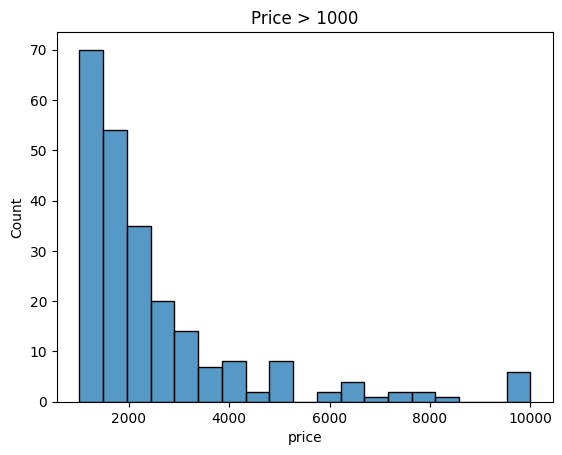

In [ ]:
sns.histplot(data =df[df["price"]>1000], x = "price")

plt.title('Price > 1000')
plt.show()

This histogram demonstrates that the large majority of AirBnBs cost anywhere from zero to $4000/night.

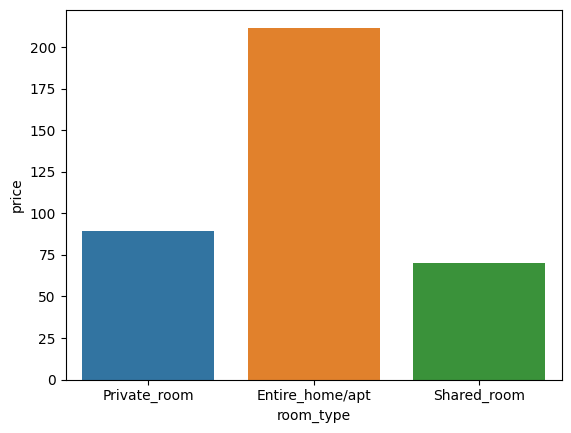

In [ ]:
sns.barplot(x=df["room_type"],y=df["price"], errorbar = None, estimator = "mean")
plt.show()

The most expensive AirBnBs tend to be ones that offer an entire home/apartment, then private rooms, and finally, at the least expensive price, are shared room AirBnBs.

In [ ]:
df.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'price'],
      dtype='object')

In [ ]:
df = df.drop(columns = ["name", "host_name", "neighbourhood"])

In [ ]:
df = pd.get_dummies(df, drop_first = True)
df.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365', 'price',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten_Island',
       'room_type_Private_room', 'room_type_Shared_room'],
      dtype='object')

There are 13 variables in the resulting dataframe ater dummy coding. 12 Predictive and 1 outcome variable

# Section 2: Explanatory Modeling   (30 points)

1. *(15 pts)* Fit an explanatory model using the whole dataset (after dropping irrelevant predictors), and print its output.
* *(5 pts)* <font color=purple> Are any of the variables insignificant? Which ones?</font>
* *(10 pts)* <font color=purple> Interpret the coefficients of the independent variables that *are* significant. Do this for at least three variables, doing this at least dummy variable and one numerical variable.</font>


In [ ]:
# Your code here
mod_spec = "price ~ latitude+longitude+minimum_nights+number_of_reviews+calculated_host_listings_count+availability_365+neighbourhood_group_Brooklyn+neighbourhood_group_Manhattan+neighbourhood_group_Queens+neighbourhood_group_Staten_Island+room_type_Private_room+room_type_Shared_room"


In [ ]:
exp_model = smf.ols(mod_spec, data = df).fit()

In [ ]:
print(exp_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     445.2
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        17:06:29   Log-Likelihood:            -3.3420e+05
No. Observations:               48807   AIC:                         6.684e+05
Df Residuals:                   48794   BIC:                         6.685e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

There is only one variable that is insignificant and it is neighbourhood_group[T.Queens] with a p value of 0.590

A majority of the variables are significant in this explanatory model. One dummy variable that is significant is neighbourhood_group[T.Manhattan] . This dummy has a p value of 0.000 making it significant. When a AirBnB is in the Brooklyn neighbourhood group, there is a 29.06 dollar increase in price relative to the Bronx. Another significant variable is minimum_nights. This is a numerical variable and has a p value of 0.033. With a increase of 1 night, there a 0.16 dollar decrease in price. The final significant variable is number_of_reviews with a p value of 0.000. When there is an additional number of reviews, there is a 0.31 dollar decrease in price

# Section 3: Predictive Modeling (40 (Regression) or 45 (Classification) points)
**Data Preprocessing** (10 points)
1. *(3 pts)* Split the data into `X` and `y`.

2. *(4 pts)* Create training and test sets, with 80\% of the data in the training set and 20\% in the test set, and save them as *train_X*, *test_X*, *train_y*, and *test_y*.
* *(3 pts)* <font color=purple> Why do we partition data when doing predictive modeling?</font>

**Fitting and Predicting the Models** (30 points for Regression, 35 points for Classification)

Next, you will create three predictive models:
  * `Model1`: either logistic regression (for classification) or MLR (for regression)
  * `Model2`: decision tree (with or without grid search)
  * `Model3`: random forest (with or without grid search)

Repeat steps 3 through 6 for each model.

3. *(2 pts x 3)* Fit the predictive model.

4. *(3 pts x 2)* Print the model coefficients (for `Model1`) or visualize the tree (for `Model2`). No output for `Model3`.

5. *(3 pts x 3)* Make predictions on the training and test sets.

6. *(2 pts x 3)* For regression problems, print the predictive accuracy measures (e.g., ME, MAE, etc.). For classification problems, display the confusion matrix.

8. *(5 pts)* For classification problems, plot the ROC curves for all three models.

* *(3 pts)* <font color=purple> Which model performs the best? What are you basing this off of?</font>


In [ ]:
# Your code here
# Create as many additional cells as needed
y = df["price"]
X =df.drop(columns='price')
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = .2, random_state= 7)

We partition data when doing predictive modeling to avoid overfitting

In [ ]:
from sklearn.linear_model import LinearRegression
Model1 = LinearRegression()
Model1.fit(train_X, train_y)
pd.DataFrame(data=Model1.coef_, index=train_X.columns)


,0
latitude,-212.433363
longitude,-537.010812
minimum_nights,-0.140345
number_of_reviews,-0.310402
calculated_host_listings_count,-0.182085
availability_365,0.201353
neighbourhood_group_Brooklyn,-37.539853
neighbourhood_group_Manhattan,26.424362
neighbourhood_group_Queens,-4.488852
neighbourhood_group_Staten_Island,-156.987358


In [ ]:
train_pred_y_Model1 = Model1.predict(train_X) # predictions on the training data
regressionSummary(train_y, train_pred_y_Model1)




Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 225.2013
     Mean Absolute Error (MAE) : 73.8248


In [ ]:
test_pred_y_Model1 = Model1.predict(test_X) # predictions on the testing data
regressionSummary(test_y, test_pred_y_Model1)


Regression statistics

                      Mean Error (ME) : 0.4754
       Root Mean Squared Error (RMSE) : 237.9531
            Mean Absolute Error (MAE) : 74.4609
          Mean Percentage Error (MPE) : -31.7062
Mean Absolute Percentage Error (MAPE) : 55.3764


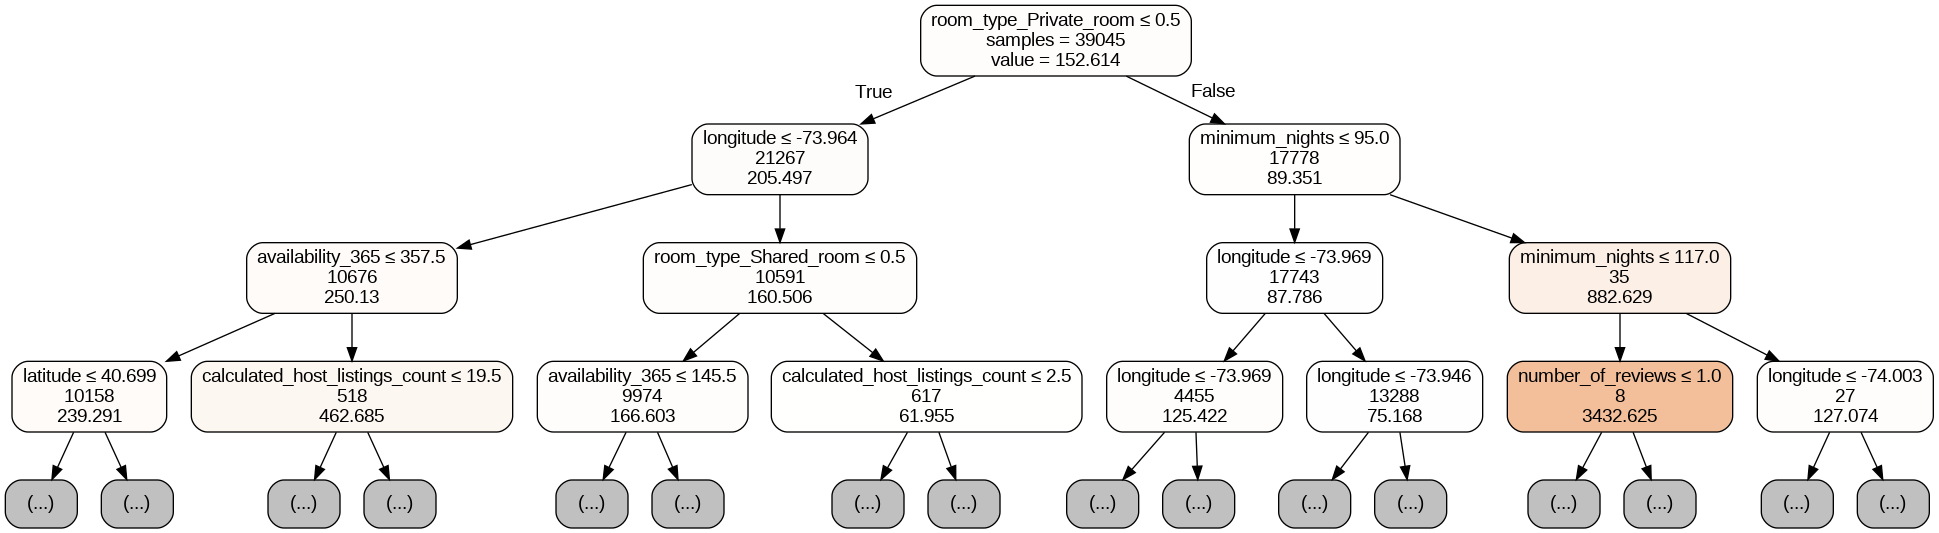

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Model2=DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_impurity_decrease=0.003, random_state=7)
Model2=Model2.fit(train_X, train_y)
plotDecisionTree(Model2,feature_names=train_X.columns, max_depth=3)

In [ ]:
train_pred_y_Model2=Model2.predict(train_X) #predictions on training set
regressionSummary(train_y, train_pred_y_Model2)



Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 212.3400
     Mean Absolute Error (MAE) : 69.4477


In [ ]:
test_pred_y_Model2=Model2.predict(test_X) #predictions on test set
regressionSummary(test_y, test_pred_y_Model2)


Regression statistics

                      Mean Error (ME) : 2.2109
       Root Mean Squared Error (RMSE) : 237.2130
            Mean Absolute Error (MAE) : 70.3267
          Mean Percentage Error (MPE) : -31.3959
Mean Absolute Percentage Error (MAPE) : 49.2353


GRID SEARCH

In [ ]:
param_grid = {
    'max_depth': [10,20,30],
    'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
    'min_samples_split': [10,15,20,40,50],
    'random_state': [1]}

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
regTree = GridSearchCV(DecisionTreeRegressor(), param_grid)

regTree.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
                         'min_samples_split': [10, 15, 20, 40, 50],
                         'random_state': [1]})

In [ ]:
regTree.best_estimator_

DecisionTreeRegressor(max_depth=10, min_impurity_decrease=0,
                      min_samples_split=50, random_state=1)

In [ ]:
regTree_train_predictions = regTree.predict(train_X)

regTree_test_predictions = regTree.predict(test_X)

In [ ]:
regressionSummary(train_y, regTree_train_predictions)

regressionSummary(test_y, regTree_test_predictions)


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 202.7409
     Mean Absolute Error (MAE) : 64.6186

Regression statistics

                      Mean Error (ME) : 2.5251
       Root Mean Squared Error (RMSE) : 238.4051
            Mean Absolute Error (MAE) : 68.1125
          Mean Percentage Error (MPE) : -26.6518
Mean Absolute Percentage Error (MAPE) : 45.3599


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Model3=RandomForestRegressor(n_estimators=500,  min_impurity_decrease = 0.001, random_state=7)
Model3=Model3.fit(train_X,train_y)


In [ ]:
train_pred_y_Model3=Model3.predict(train_X)
regressionSummary(train_y, train_pred_y_Model3)


Regression statistics

               Mean Error (ME) : -1.7815
Root Mean Squared Error (RMSE) : 81.7150
     Mean Absolute Error (MAE) : 24.5783


In [ ]:
test_pred_y_Model3=Model3.predict(test_X)
regressionSummary(test_y,test_pred_y_Model3)


Regression statistics

                      Mean Error (ME) : -2.6983
       Root Mean Squared Error (RMSE) : 234.3981
            Mean Absolute Error (MAE) : 65.7387
          Mean Percentage Error (MPE) : -26.9388
Mean Absolute Percentage Error (MAPE) : 43.7546


The model that works the best is Model3 or the random forest. We are basing this off of mean absolute error of the test set between the 3 models. Model3 has the lowest MAE making it the model that performs the best.


GRID SEARCH

In [ ]:
param_grid2 = {
    'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
    'min_samples_split': [10,15,20,40,50],
    'max_depth':[10,20,30],
    "random_state": [1]}

In [ ]:
RF_reg = GridSearchCV(RandomForestRegressor(), param_grid2)
RF_reg.fit(train_X, train_y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
                         'min_samples_split': [10, 15, 20, 40, 50],
                         'random_state': [1]})

In [ ]:
RF_reg.best_estimator_

RandomForestRegressor(max_depth=20, min_impurity_decrease=0.01,
                      min_samples_split=40, random_state=1)

In [ ]:
RF_train_predictions = RF_reg.predict(train_X)

RF_test_predictions = RF_reg.predict(test_X)

In [ ]:
regressionSummary(train_y, RF_train_predictions)

regressionSummary(test_y, RF_test_predictions)


Regression statistics

               Mean Error (ME) : -0.6696
Root Mean Squared Error (RMSE) : 185.6161
     Mean Absolute Error (MAE) : 54.8709

Regression statistics

                      Mean Error (ME) : -0.5951
       Root Mean Squared Error (RMSE) : 232.8412
            Mean Absolute Error (MAE) : 65.3811
          Mean Percentage Error (MPE) : -27.3063
Mean Absolute Percentage Error (MAPE) : 43.9569


# Section 4: Computing the value of your work (Regression) (20 points)

In this section, you will compare the performance of two models:
* a naive model (in which the predicted variable is simply the *average of the outcome variable* in the data used to fit the model); and
* one of your models from above.

1. *(6 pts)* Create a dataframe that contains three columns:
  * the actual outcome variable for the test set;
  * the predicted outcome variable for the test set for your chosen model; and
  * the predicted outcome variable for the test set using the naive model.
*Hint: We did something similar in the Class 21 notebook. Alternately, a little Googling should help.*

**Problem Setup**

For your dataset, the host will incur a cost from renting out each AirBnB. Assume that this is equal to 70\% of the *actual* listing price.

If the predicted price exceeds the actual listing price by more than 10\%, the unit will not be rented, and the host earns zero profit. Otherwise, the expected profit for each listing is the difference between the predicted price and the cost the host incurs.

Mathematically, this is as follows. Let *actual_price* refer to the actual listing price; *cost_to_host* refers to the cost incurred by the host; *pred_price* refers to the predicted price from a given model; and *exp_profit* refer to the expected profit for each listing. Then,

$
\begin{align}
cost\_to\_host &= 0.7 * actual\_price \\
exp\_profit &=
\begin{cases}
pred\_price - cost\_to\_host, & \mbox{if } pred\_price \leq 1.1 * actual\_price,\\
0, & \mbox{if } pred\_price > 1.1 * actual\_price.\\
\end{cases}
\end{align}
$

Using this information, do the following.

2. *(2 pts)* Add a column called *cost_to_host* in the above dataframe.
3. *(4 pts)* Add two new columns, representing the expected profit from each of the two models.

**Value Calculation**
4. *(3 pts)* Calculate the average expected profit from each of the two models.

* *(5 pts)* <font color=purple> What is the average benefit from using your model instead of a naive model? (If you don't see there is a benefit, you may want to choose a different model or double-check your analysis!)</font>

In [ ]:
# Your code here
new_df = pd.DataFrame(test_y)
new_df.columns = ['actual_test_y']#changing column name
new_df["Model3_Predictions"] = test_pred_y_Model3
new_df["Naive_Model_Prediction"] = np.where(test_y >=0, train_y.mean(), 0)
new_df.head()

,actual_test_y,Model3_Predictions,Naive_Model_Prediction
22035,65,68.046320,152.613548
18599,80,65.043886,152.613548
16419,75,65.925022,152.613548
24752,150,169.676794,152.613548
39397,150,140.057180,152.613548


In [ ]:
cost_to_host = .70*test_y
new_df["cost_to_host"] = cost_to_host
new_df.head()

,actual_test_y,Model3_Predictions,Naive_Model_Prediction,cost_to_host
22035,65,68.046320,152.613548,45.5
18599,80,65.043886,152.613548,56.0
16419,75,65.925022,152.613548,52.5
24752,150,169.676794,152.613548,105.0
39397,150,140.057180,152.613548,105.0


In [ ]:
new_df["exp_profit_Model3"] = np.where(test_pred_y_Model3 <= 1.1*new_df["actual_test_y"], test_pred_y_Model3 - cost_to_host, 0)
new_df["exp_profit_Naive"] = np.where(new_df["Naive_Model_Prediction"] <= 1.1*test_y, new_df["Naive_Model_Prediction"] - cost_to_host, 0)
new_df.head()

,actual_test_y,Model3_Predictions,Naive_Model_Prediction,cost_to_host,exp_profit_Model3,exp_profit_Naive
22035,65,68.046320,152.613548,45.5,22.546320,0.000000
18599,80,65.043886,152.613548,56.0,9.043886,0.000000
16419,75,65.925022,152.613548,52.5,13.425022,0.000000
24752,150,169.676794,152.613548,105.0,0.000000,47.613548
39397,150,140.057180,152.613548,105.0,35.057180,47.613548


In [ ]:
print("The average expected profit from Model 3, the random forest  model is", new_df["exp_profit_Model3"].mean())
print("The average expected profit for the Naive model is", new_df["exp_profit_Naive"].mean())

The average expected profit from Model 3, the random forest  model is -2.045181500510595
The average expected profit for the Naive model is -14.696297594098223


In [ ]:
new_df["exp_profit_Model3"].mean()-new_df["exp_profit_Naive"].mean()

12.651116093587628

Both Model3 and the Naive model have a negative expected profit. However, Model3 or our random forest model is the better of the 2 models because it has a smaller negative profit. On average,  Model3 will have a benefit or savings of $12.52 compared to the Naive model.